<details>
<summary>Lables in our Fashion👔 dataset</summary>
    - 0 T-shirt/top
    - 1 Trouser
    - 2 Pullover
    - 3 Dress
    - 4 Coat
    - 5 Sandal
    - 6 Shirt
    - 7 Sneaker
    - 8 Bag
    - 9 Ankle boot
</details>

In [109]:
# Basic libraries
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
# Hog features
from skimage.feature import hog
# openCV used to try SIFT descriptors
import cv2
# PCA as way to reduce the features dim
from sklearn.decomposition import PCA
# preprocessing used in PCA
from sklearn.preprocessing import StandardScaler
# cross validation and Grid Search
from sklearn.model_selection import cross_val_score, GridSearchCV
# metrics
from sklearn.metrics import classification_report,accuracy_score, confusion_matrix

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier, GradientBoostingClassifier


In [2]:
train = pd.read_csv('fashion-mnist_train.csv')
test = pd.read_csv('fashion-mnist_test.csv')

display(f"Train shape {train.shape}", f"Test shape {test.shape}")

'Train shape (60000, 785)'

'Test shape (10000, 785)'

In [3]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# we would need to scale the pixels 
train.describe()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.00000
mean,4.500000,0.000900,0.006150,0.035333,0.101933,0.247967,0.411467,0.805767,2.198283,5.682000,...,34.625400,23.300683,16.588267,17.869433,22.814817,17.911483,8.520633,2.753300,0.855517,0.07025
std,2.872305,0.094689,0.271011,1.222324,2.452871,4.306912,5.836188,8.215169,14.093378,23.819481,...,57.545242,48.854427,41.979611,43.966032,51.830477,45.149388,29.614859,17.397652,9.356960,2.12587
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,4.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,58.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,9.000000,16.000000,36.000000,226.000000,164.000000,227.000000,230.000000,224.000000,255.000000,254.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,170.00000


In [5]:
def showOneImage(row, df=train, colors = "gray"):
    plt.imshow(df.iloc[row, 1:].values.reshape(28,28), cmap=colors)


def showLabel(label, df=train, n=50):
    labelselect = df.loc[df['label'] == label, "label":]
    plt.figure(figsize=(10,5), dpi=150)

    for i in range(min(n, len(labelselect))):
        plt.subplot(n // 10, 10, i + 1) 
        image_data = labelselect.iloc[i, 1:].values.reshape(28, 28) 
        plt.imshow(image_data, cmap='gray')
        plt.xticks([])
        plt.yticks([])

    plt.show()


'label 0'

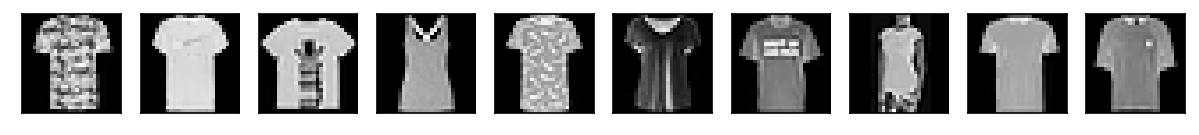

'label 1'

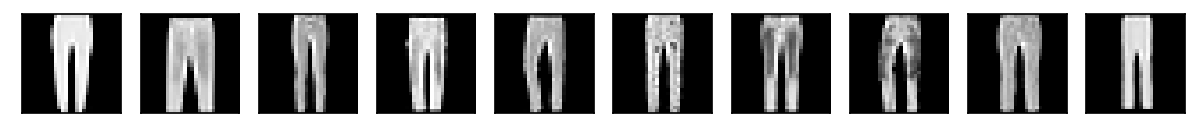

'label 2'

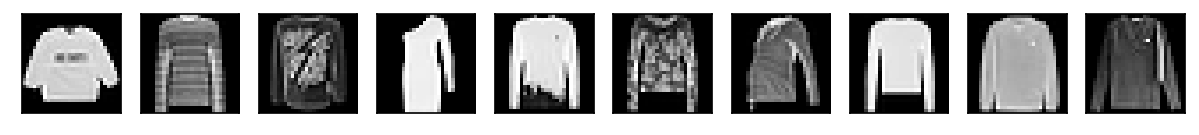

'label 3'

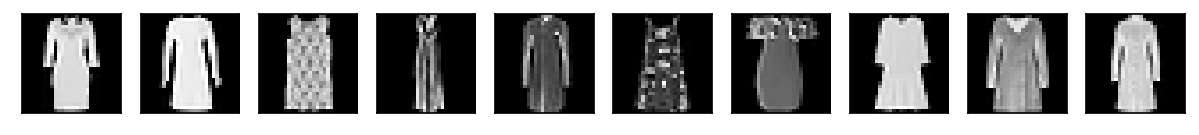

'label 4'

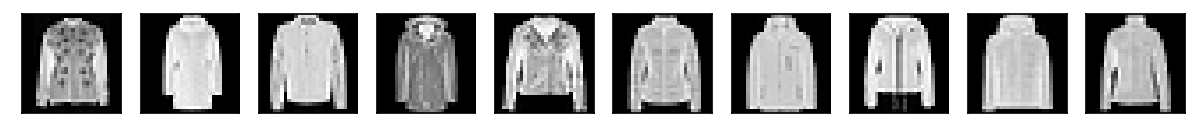

'label 5'

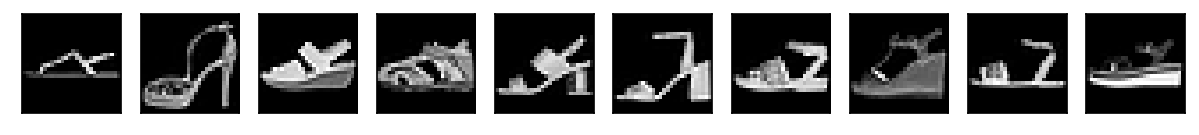

'label 6'

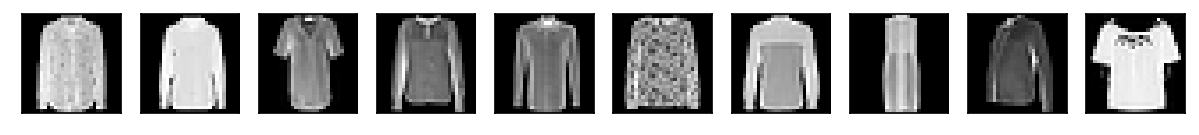

'label 7'

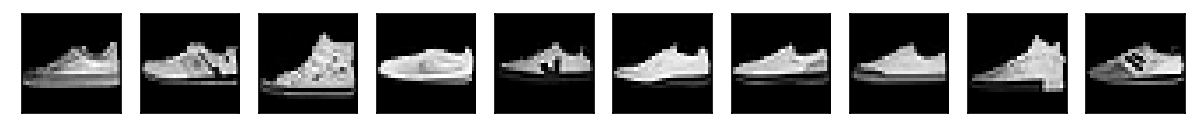

'label 8'

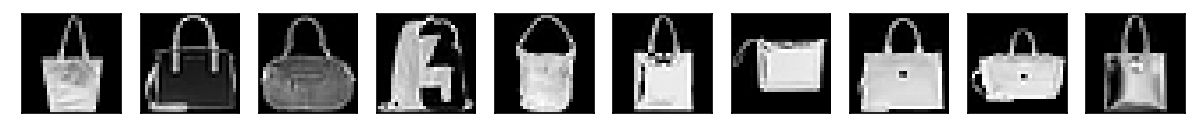

'label 9'

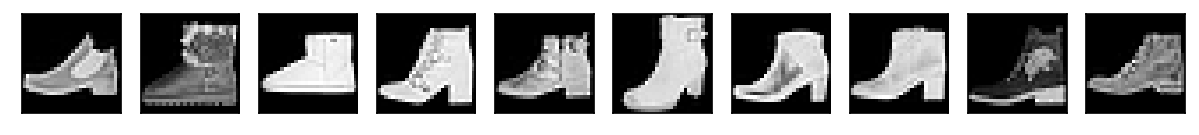

In [6]:
for label in range(10):
    display(f"label {label}")
    showLabel(label, n=10)


In [7]:
# Function to compute HOG features for a single image
def compute_hog_features(image):
    # Reshape the image to its original shape (28x28 for MNIST)
    image = image.reshape((28, 28))
    # Compute HOG features
    # features, hog_image = hog(image, orientations=8, pixels_per_cell=(4, 4), cells_per_block=(1, 1), visualize=True)
    features, hog_image = hog(image, orientations=8, visualize=True)
    return features, hog_image


'The shape of the HoG (72,)'

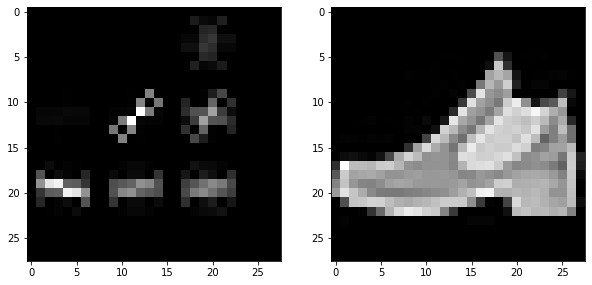

In [8]:
# which image to show 
row = 1

fig, (ax0, ax1) = plt.subplots(1,2, figsize=(10,10))

features, hog_image = compute_hog_features(train.iloc[row, 1:].values)

display(f"The shape of the HoG {features.shape}")

# features, hog_image

ax0.imshow(hog_image, cmap="gray");
ax1.imshow(train.iloc[row, 1:].values.reshape(28,28), cmap="gray");


In [9]:
# train_hog = np.array([compute_hog_features(image) for image in train])

# train.iloc[row, 1:].values
#  iterrows(), each iteration returns a tuple containing the index and the row data
train_hog = [compute_hog_features(row[1:].values)[0] for _, row in train.iterrows()]
train_hog


[array([0.05784517, 0.1940398 , 0.20725961, 0.06828004, 0.05880705,
        0.0004892 , 0.        , 0.00377665, 0.01196855, 0.08459952,
        0.17095411, 0.23762933, 0.23762933, 0.13439379, 0.05645731,
        0.00154698, 0.01006368, 0.01549605, 0.        , 0.11400296,
        0.20834203, 0.23762933, 0.23762933, 0.03799423, 0.23762933,
        0.23762933, 0.02722539, 0.01117509, 0.00805739, 0.00313309,
        0.00887874, 0.06662838, 0.06901516, 0.03489902, 0.05833927,
        0.19596671, 0.18667505, 0.06272979, 0.01669285, 0.04107069,
        0.03353184, 0.01948486, 0.05190902, 0.05371033, 0.06228245,
        0.03510375, 0.18780019, 0.11237514, 0.09916865, 0.09621251,
        0.06215586, 0.07295723, 0.23762933, 0.17385505, 0.1616568 ,
        0.17032214, 0.00175021, 0.        , 0.00157761, 0.05277116,
        0.05121613, 0.02954904, 0.02537239, 0.0145124 , 0.23762933,
        0.06736303, 0.00690165, 0.04104857, 0.08745312, 0.20115747,
        0.08141611, 0.06572711]),
 array([0.0003

In [10]:
train_hog[0].reshape(1, -1).shape


(1, 72)

In [11]:
train_hog = np.array(train_hog).reshape(len(train_hog),-1)
train_hog.shape

(60000, 72)

In [12]:
# hog_df
train_hog_df = pd.DataFrame(train_hog)
train_hog_df.head()

,0,1,2,3,4,5,6,7,8,9,...,62,63,64,65,66,67,68,69,70,71
0,0.057845,0.194040,0.207260,0.068280,0.058807,0.000489,0.000000,0.003777,0.011969,0.084600,...,0.025372,0.014512,0.237629,0.067363,0.006902,0.041049,0.087453,0.201157,0.081416,0.065727
1,0.000394,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001181,0.000000,...,0.013579,0.030951,0.041209,0.020112,0.198062,0.270952,0.259899,0.092271,0.074821,0.047910
2,0.257989,0.225401,0.105295,0.028898,0.009615,0.000000,0.001612,0.013724,0.083109,0.166780,...,0.046172,0.059946,0.290640,0.022658,0.068237,0.000000,0.022346,0.039562,0.020390,0.290640
3,0.128701,0.175918,0.190101,0.058635,0.044771,0.016389,0.018411,0.001277,0.153229,0.044253,...,0.148202,0.166557,0.127487,0.056144,0.091727,0.088432,0.046796,0.080052,0.097072,0.205857
4,0.257131,0.141440,0.000000,0.000000,0.000000,0.000000,0.000000,0.040207,0.135338,0.046181,...,0.047053,0.253988,0.265136,0.000772,0.000244,0.000546,0.002763,0.000000,0.000867,0.166677


In [13]:
train_hog_df["label"] = train["label"]
train_hog_df.sample(10)

,0,1,2,3,4,5,6,7,8,9,...,63,64,65,66,67,68,69,70,71,label
15334,0.000000,0.000000,0.000000,0.000000,0.000169,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.081645,0.298496,0.298496,0.000000,0.000000,0.000000,7
32959,0.163369,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.051873,0.264715,0.182085,...,0.035132,0.264715,0.065982,0.002328,0.137665,0.001507,0.013032,0.185340,0.264715,6
47656,0.122508,0.182645,0.008873,0.037528,0.029852,0.034414,0.000000,0.000000,0.178885,0.064801,...,0.032840,0.262282,0.015790,0.005716,0.002551,0.000000,0.033518,0.130061,0.262282,6
6245,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.005412,0.000000,...,0.037682,0.018835,0.041862,0.156391,0.077066,0.245543,0.141615,0.030890,0.013347,9
27933,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000866,0.066249,...,0.012955,0.034897,0.075654,0.072056,0.269915,0.226422,0.008762,0.120239,0.055728,9
17256,0.276909,0.176805,0.037177,0.015401,0.026843,0.010347,0.018347,0.043511,0.215396,0.087795,...,0.041135,0.132136,0.037432,0.029837,0.010549,0.100754,0.032801,0.150038,0.276909,0
17659,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.066359,0.000000,...,0.035409,0.037226,0.029950,0.011821,0.269568,0.269568,0.200487,0.077193,0.007595,9
36030,0.037400,0.051892,0.247762,0.041028,0.235553,0.120973,0.128050,0.014444,0.000000,0.113065,...,0.000000,0.000000,0.019528,0.012553,0.090305,0.299431,0.015563,0.016640,0.000000,8
28916,0.011077,0.000000,0.031652,0.290583,0.290583,0.000000,0.017892,0.000000,0.000000,0.000000,...,0.000752,0.002377,0.007062,0.007479,0.290583,0.290583,0.002341,0.006537,0.005186,8
57545,0.037349,0.000000,0.040269,0.000000,0.002720,0.000000,0.026692,0.036240,0.199688,0.112673,...,0.149947,0.106994,0.108753,0.074119,0.133328,0.072405,0.165595,0.214628,0.202359,3


In [14]:
# let's do the same steps fot the test dataset 
# iterrows(), each iteration returns a tuple containing the index and the row data
test_hog = [compute_hog_features(row[1:].values)[0] for _, row in test.iterrows()]

# reshaping 
test_hog = np.array(test_hog).reshape(len(test_hog), -1)

# creating test_hog_df dataframe 
test_hog_df = pd.DataFrame(test_hog)

# adding labels 
test_hog_df["label"] = test["label"]

# displaying a sample
test_hog_df.sample(10)

,0,1,2,3,4,5,6,7,8,9,...,63,64,65,66,67,68,69,70,71,label
8135,0.236853,0.276483,0.105618,0.019353,0.001472,0.006823,0.000000,0.000000,0.187919,0.154145,...,0.010597,0.126268,0.000000,0.009494,0.021768,0.027578,0.007838,0.019463,0.274540,4
1759,0.010604,0.021362,0.033056,0.061081,0.120409,0.016978,0.000000,0.000000,0.000000,0.000000,...,0.035752,0.017567,0.069879,0.087944,0.286261,0.286261,0.069757,0.012638,0.033168,8
9256,0.237110,0.252003,0.218862,0.078675,0.021302,0.003593,0.040632,0.031184,0.068608,0.075695,...,0.072914,0.252003,0.001987,0.004181,0.039862,0.027879,0.009503,0.001997,0.252003,0
7570,0.040482,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.034924,0.157029,0.191394,...,0.261337,0.146341,0.040766,0.000000,0.000000,0.008145,0.032229,0.227179,0.210691,3
9033,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.021774,0.049001,...,0.009820,0.241875,0.241875,0.241875,0.158132,0.084482,0.116441,0.088449,0.131615,5
2797,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003144,0.050572,...,0.015884,0.008767,0.007939,0.026261,0.320644,0.320644,0.002757,0.001209,0.000000,7
1273,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.116437,0.049562,0.074315,0.276075,0.181749,0.276075,0.009225,0.009286,0.016587,5
5293,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.015209,0.027800,...,0.170478,0.258253,0.197530,0.207043,0.107036,0.052483,0.080273,0.052158,0.000000,5
9444,0.250304,0.161580,0.080054,0.010516,0.000210,0.021701,0.003558,0.013314,0.157376,0.043193,...,0.093992,0.248580,0.014634,0.050008,0.082464,0.099330,0.016310,0.171495,0.259204,2
204,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.036433,0.037010,0.001998,0.044502,0.240869,0.249671,0.223798,0.000000,0.164392,5


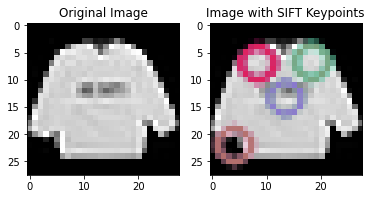

In [15]:
image = train.iloc[0, 1:].values.reshape(28, 28).astype(np.uint8)

'''
astype(np.uint8)
This is a NumPy data type representing unsigned 8-bit integers. The range of values for uint8 is typically 0 to 255.
SIFT implementation, which expects pixel values to be in the uint8 range
Pixel values are often represented as integers in the range [0, 255].
'''
# Initialize SIFT detector
sift = cv2.SIFT_create()

# Detect SIFT features
keypoints, descriptors = sift.detectAndCompute(image, None)
'''
The mask is used to specify a region in the image where keypoint detection should be performed. 
If None is passed as the mask, the entire image is considered.
'''

# Visualize SIFT keypoints on the image
image_with_keypoints = cv2.drawKeypoints(image, keypoints, None)
'''
the third argument represents the output image where the keypoints will be drawn.
If you pass None as the output image, the function will create a new output image with the same size as the input image,
and it will draw the keypoints on this new image. 
'''

# the original image 
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

# the image with keypoints
plt.subplot(1, 2, 2)
plt.imshow(image_with_keypoints, cmap='gray')
plt.title('Image with SIFT Keypoints')

plt.show()


In [16]:
descriptors, descriptors.shape

(array([[ 0.,  0.,  0., ...,  0.,  1.,  2.],
        [ 1., 16.,  2., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  1.],
        ...,
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  1.,  3.],
        [ 2.,  0.,  0., ...,  0.,  0.,  0.]], dtype=float32),
 (8, 128))

## SIFT is not suitable for our problem 
Sift can be good for 
- Object detection
- image matching
- Large images 
It's bad in our case because the image size is small 28*28

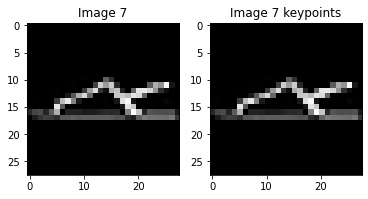

In [17]:
# SIFT is not suitable for this problem as some images SIFT won't be able to extract any keypoint therfore we can' use it for the whole dataset 
# this due to that mostly the small size of the images we are dealing with 28×28

# Initialize SIFT detector
sift = cv2.SIFT_create()

image7 = train.iloc[7 ,1:].values.reshape(28,28).astype(np.uint8)
keypoints7, descriptors7 = sift.detectAndCompute(image7, None)
# visualize the SIFT
image_with_keypoints7 = cv2.drawKeypoints(image7, keypoints7, None)
# to plot the two side by side
plt.subplot(1, 2, 1)
plt.imshow(image7, cmap="gray")
plt.title('Image 7')

plt.subplot(1, 2, 2)
plt.imshow(image_with_keypoints7, cmap="gray")
plt.title('Image 7 keypoints')

plt.show()

In [54]:
# PCA
def do_pca(n_component, dataset, pca_object=None):
    X = StandardScaler().fit_transform(dataset)
    
    if pca_object is None:
        # If no PCA object is provided, create a new one
        pca = PCA(n_components=n_component)
        x_pca = pca.fit_transform(X)
        return pca, x_pca
    else:
        # Use the provided PCA object to transform the data
        x_pca = pca_object.transform(X)
        return pca_object, x_pca

In [19]:
pca40, x_40pca = do_pca(40, train.drop(columns="label"))
x_40pca.shape

(60000, 40)

In [20]:
train_pca40_df = pd.DataFrame(x_40pca)
train_pca40_df.head()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,10.664973,14.993363,-0.689468,-10.980911,4.788254,0.559623,2.141115,-2.582798,-4.525368,-0.758683,...,-1.524359,1.198187,-2.192369,-2.615525,-2.280592,-2.758335,2.146064,0.316909,-1.427955,4.003460
1,-11.989748,11.812770,-5.801049,-3.418629,-4.630650,2.061772,-3.109565,-3.308504,-4.461977,5.669072,...,-0.463063,1.594096,-0.005819,0.646734,1.422425,-2.314210,-0.987075,-2.157744,0.413145,-1.751916
2,20.517671,1.579784,6.770122,-2.884371,-5.379185,2.618096,-0.246181,-2.936941,3.415352,-1.236734,...,0.265085,-0.354602,-0.343072,0.290839,0.484213,0.592551,0.015656,-0.504224,0.717910,-1.009940
3,9.634535,-6.790917,-0.907860,4.577228,8.377438,-0.094376,-8.672806,-0.604500,-2.566944,-3.070933,...,0.625431,1.139598,0.599430,-0.936445,-1.233553,2.421211,-1.915970,1.045378,0.195476,2.256974
4,11.493442,-11.655488,-7.208334,-4.772964,-0.594114,0.553685,0.388620,-0.384220,2.063611,-4.824831,...,-1.470293,-1.239621,0.570310,-2.015983,1.074811,-2.620545,-2.147748,1.103712,0.713493,1.200703


In [21]:
train_pca40_df["label"] = train["label"]
train_pca40_df.sample(10)

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,label
49784,-5.996413,-3.105084,10.991261,2.261043,-1.376341,-3.876718,1.740818,-1.858208,-0.545647,-0.891909,...,-0.903106,-1.032008,-0.635594,-0.835083,-0.319780,-0.518395,-0.240085,1.094655,-0.594690,4
20735,0.689590,-11.292003,-1.674325,-0.822142,0.501449,0.789354,1.437250,-1.736849,1.792277,-3.522529,...,0.936221,-1.038401,-2.517278,1.138840,-1.272536,0.740783,-3.080674,-0.269719,0.242453,3
4588,6.587598,0.149124,2.014857,-6.813285,-4.729179,-1.318094,-2.000713,-5.553238,4.114346,0.383067,...,-2.399527,-0.580895,1.704458,-1.501897,1.171719,1.173530,-0.548732,-0.119342,-2.082830,4
54824,10.386159,33.724509,-9.521676,0.643404,29.660746,-5.871253,24.877552,-13.165293,16.977193,-0.037132,...,0.862134,-1.346822,-1.451754,-9.228175,-6.423676,1.763417,-0.079939,-4.845917,2.509324,8
3502,6.133828,-1.459156,4.339464,0.873424,-3.543793,-0.850014,0.806848,-4.964821,-1.377131,1.547547,...,-2.396593,2.016451,3.226044,0.724404,-0.084287,2.405505,-0.135196,-1.442360,-0.305671,6
22094,0.464966,-15.998528,-7.463158,-2.898176,-0.802393,-8.119555,5.154207,1.463751,-1.774581,4.882367,...,-0.238746,2.805939,1.604709,-1.130860,0.180410,-1.128182,1.810679,-0.778878,-0.811256,1
36154,10.131250,-8.300611,-1.482174,3.676981,7.038115,-0.966448,-8.246581,0.254832,-2.907957,-3.040964,...,0.435975,0.970211,-0.365485,-0.983222,-0.935869,-2.526122,-0.601511,-0.356519,1.730724,0
3781,8.702882,-9.771468,-2.918467,1.469822,0.954475,4.600978,-3.436608,-1.254952,0.288841,-2.117150,...,0.014928,-0.679489,1.827571,-0.219959,0.309918,0.462217,4.180942,-1.267190,-1.417830,3
57118,-2.513981,-16.486303,-5.487173,-0.383084,-0.980069,-8.373025,5.670395,0.737409,-1.602775,3.662692,...,-0.198398,0.794981,1.467492,-0.852660,0.140198,0.530096,0.086336,-0.690493,0.504940,1
33055,-2.391003,-8.487708,-0.917956,-3.221898,-0.488267,-0.087377,-0.351044,-2.131852,1.677957,-1.628503,...,0.439629,-0.680915,-0.176222,-1.884770,0.283444,0.593969,-0.388353,0.765238,-1.275922,4


In [55]:
# pca for test data
# using the same pca object fitted on the train data on the test and any new data⚠️ 'pca40' 
pca40_test, x_40pca_test = do_pca(40, test.drop(columns="label"), pca_object=pca40)

# pca test to dataframe 
test_pca40_df = pd.DataFrame(x_40pca_test)

# adding the label 
test_pca40_df["label"] = test["label"]

# displaying
display(test_pca40_df.shape, test_pca40_df.sample(10))


(10000, 41)

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,label
2920,-15.504742,6.544955,0.043305,-11.310069,2.200618,2.067352,-1.504508,7.306693,1.826907,-0.872869,...,0.873889,1.263920,-0.594561,-1.664140,0.650157,-2.166672,-0.521020,-0.029386,-1.137125,7
8046,-2.177663,-14.616945,-8.810740,-0.699069,-1.262122,1.836471,5.505830,1.965305,0.046451,-3.558167,...,-0.650724,0.298782,0.140244,-1.591239,-1.348773,-0.700927,-1.743954,0.315602,0.485824,3
3362,1.823774,-15.563610,-9.272232,-1.515852,-1.286877,1.265754,5.278464,1.769784,-1.358698,-0.466655,...,1.060303,0.571364,0.404859,-1.285274,1.340387,-1.266190,1.378606,-0.303403,-1.140163,3
6611,-5.551111,18.093718,-2.038187,-3.601088,17.227950,-3.384040,13.420845,-11.183767,2.754979,-1.843262,...,4.275744,-0.296264,2.383980,1.436035,-1.905479,-4.153966,-0.771054,2.190462,0.305488,8
6937,-3.685737,-5.794952,7.973819,-2.240418,-1.085963,-5.203581,-3.905110,-1.886091,5.485725,1.695444,...,-0.792898,2.657622,0.937973,1.751444,0.963879,-1.583029,1.122824,-0.936592,0.112298,2
9403,-1.508969,-9.964655,-5.623506,-3.550711,-0.975881,0.622254,0.672333,0.438435,-0.723551,3.386137,...,0.589945,0.321622,4.263854,-3.360681,4.292787,1.264924,-0.703682,-1.607842,-2.039619,3
7164,18.206754,-0.240540,-0.402224,7.281952,12.607778,4.342916,-7.883472,-2.908267,2.889100,-1.291842,...,-2.094238,0.241452,1.619402,0.458412,0.142948,-3.964051,-0.749694,2.049676,-0.828002,0
9985,-5.295191,-10.511287,3.136838,3.771602,4.045084,2.094715,-0.503528,-2.443827,-2.687465,-3.565744,...,0.999764,-0.823927,1.081713,-0.474352,-0.122619,0.640868,0.390268,-1.424891,-1.234204,0
668,-12.010012,-2.179786,6.318134,1.249936,-2.075064,6.118240,1.996641,-2.072611,0.367285,1.833605,...,-2.566946,0.342198,-0.469262,-2.831001,1.213392,0.917816,0.079236,1.223184,-0.595083,8
7142,-6.531699,12.264462,-6.175200,11.466466,-4.893143,-0.825853,0.174706,-5.004003,-1.278828,-2.010867,...,1.756839,0.881287,-1.730938,-0.716451,1.092246,-0.444564,3.037361,-0.311135,1.083718,9


# Scaling the Pixel values 

In [23]:
train_scaled = train.drop(columns="label")/255
test_scaled = test.drop(columns="label")/255 

In [24]:
train_scaled["label"] = train["label"]
test_scaled["label"] = test["label"]

In [25]:
train_scaled.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,label
0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,2
1,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,9
2,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.019608,0.0,0.0,...,0.0,0.0,0.117647,0.168627,0.000000,0.0,0.0,0.0,0.0,6
3,0.0,0.0,0.0,0.003922,0.007843,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.003922,0.0,0.0,0.0,0.0,0
4,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,3


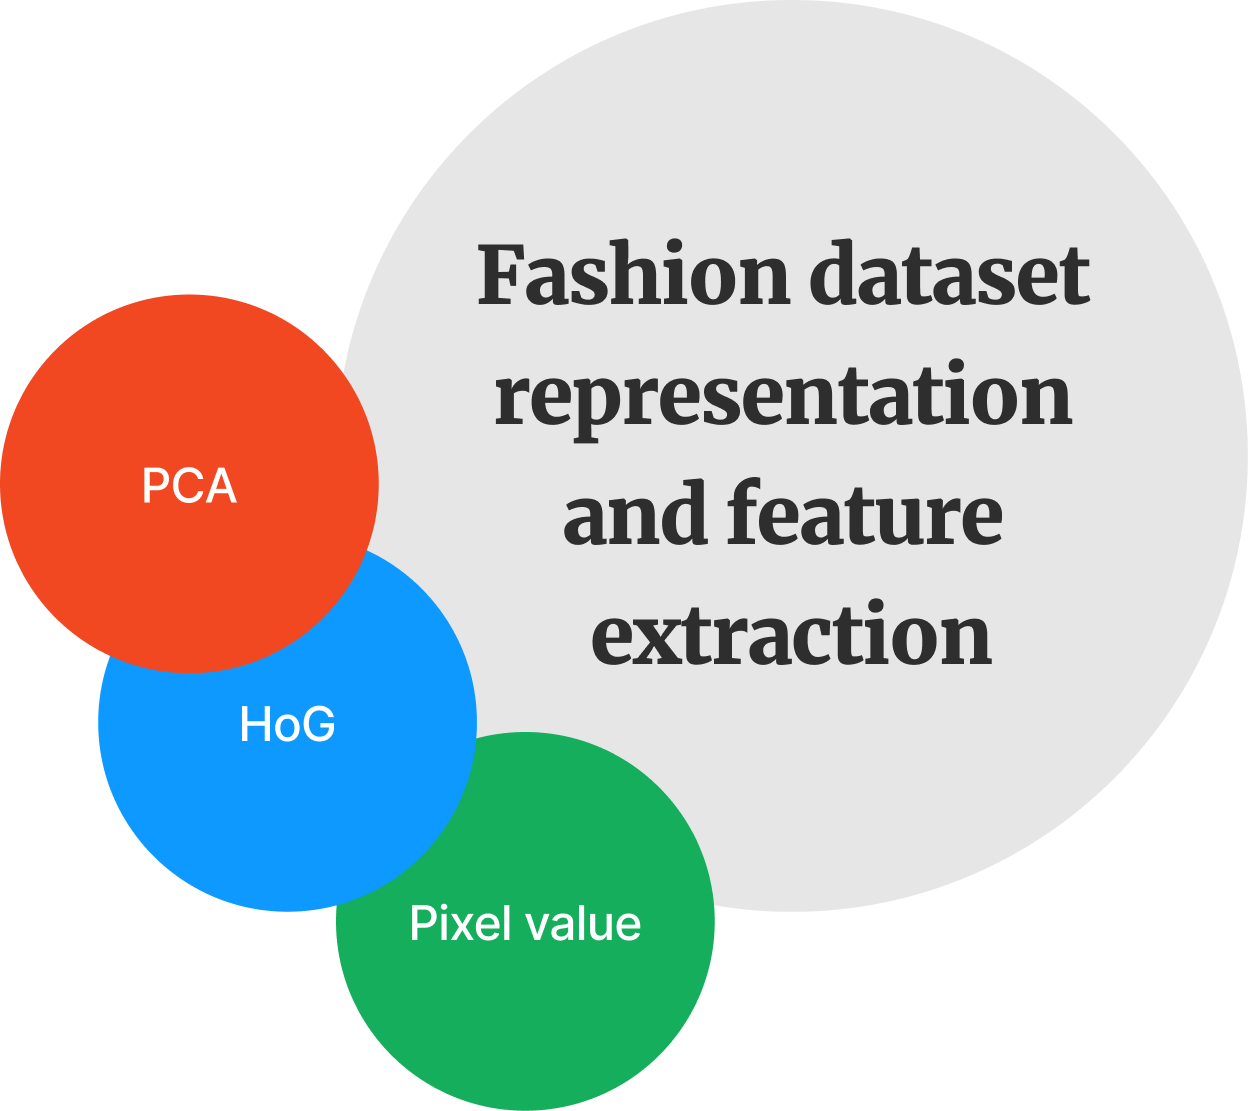

<h1 style="color:salmon">Modles</h1>

In [26]:
# Spliting the data
def split_df(df_train, df_test):
    X_train = df_train.drop(columns = "label")
    y_train = df_train["label"]
    X_test = df_test.drop(columns = "label")
    y_test = df_test["label"]
    return X_train, X_test, y_train, y_test

In [56]:
# Spliting for Pixel Value dataset 🟢
X_train_px, X_test_px, y_train_px, y_test_px = split_df(train_scaled, test_scaled)
# Spliting for Hog 🔵
X_train_hog, X_test_hog, y_train_hog, y_test_hog = split_df(train_hog_df, test_hog_df)
# Spliting for PCA 🔴
X_train_40pca, X_test_40pc, y_train_40pca, y_test_40pca = split_df(train_pca40_df, test_pca40_df)

## Logistic Regression for Pixel Value dataset 🟢

You can use Logistic regression for multi-classification problem by one of the two ways:
| multi-class =’ovr’ | multi-class =’multinomial’ |
| --- | --- |
| one-vs-rest (OvR) scheme | use cross-entropy loss |
|  | supported only by the ‘lbfgs’, ‘sag’, ‘saga’ and ‘newton-cg’ solvers. |


>OvR: separate binary classifier is trained to distinguish that class from all the other classes combined. So, if you have K classes, you train K binary classifiers.

>The prediction is then made by running all K classifiers on a test instance and selecting the class for which the corresponding classifier gives the highest confidence or probability.


| multiclass | binary |
| --- | --- |
| ‘newton-cg’‘sag’‘saga’‘lbfgs’  handle mutinomial loss, auto, multinomial | OvR, auto |

```python
if auto is set :
	if liblinear or binary:
		select OvR
	else:
		select multinomial
```

Penality and solvers


`elasticnet`: both L1 and L2 penalty terms are added
| l1 | l2 | elasticnet | None |
| --- | --- | --- | --- |
| ‘liblinear’‘saga’ | ‘lbfgs’ ‘liblinear’‘newton-cg’‘sag’‘saga’ | only with saga | ‘lbfgs’‘newton-cg’‘sag’‘saga’ |


Large dataset Vs Small datasets Solvers
| Small datasets | Large datesets |
| --- | --- |
|  ‘liblinear’ | ‘sag’‘saga’ |


https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html







1. **'lbfgs' (Limited-memory Broyden–Fletcher–Goldfarb–Shanno):**
    - This solver is based on quasi-Newton methods.
    - It belongs to the family of iterative optimization algorithms that aim to find the minimum of a function.
    - It uses an approximation of the inverse Hessian matrix to update the weights iteratively.
2. **'liblinear':**
    - Uses a coordinate descent algorithm.
    - Applies a variant of the Newton-Raphson method for logistic regression.
    - Suitable for small to medium-sized datasets and is efficient for high-dimensional data.
3. **'newton-cg' (Newton-Conjugate Gradient):**
    - Uses a Newton-CG optimization algorithm.
    - Handles multinomial loss for multiclass problems.
    - It iteratively applies the Newton-Raphson method along the conjugate gradient direction to find the optimal weights.
4. **'sag' (Stochastic Average Gradient):**
    - Applies a stochastic optimization algorithm.
    - Particularly well-suited for large datasets.
    - Uses a stochastic approximation of the true gradient.
5. **'saga' (SAGA - Stochastic Average Gradient Descent):**
    - An improved version of 'sag'.
    - Supports L1 regularization in addition to L2 regularization.
    - Uses a faster variant of the SAG algorithm.
6. **'newton-cholesky':**
    - Applicable when there are many more samples than features.
    - Limited to binary classification and the one-versus-rest reduction for multiclass classification.
    - Computes the Hessian matrix using the Cholesky decomposition method.

> We have a multi_class problem with a larg dataset 60k samples, we scaled the data (pre-condition), and we can use OvR or multinomial, OvR would make 9 classifiers as we had 9 classes, and multinomial use one classifier and minimize the mutli-class loss such as Cross-Entropy (log-loss) anyway the 'auto' option would deal with this as some solvers won't work with some options.

> Solvers we may use 
- libfgs ❌ slow, not suitable for larg datasets (default)
- liblinear ❌ slow, not suitable for larg datasets
- newton-cg ✅ let's give it a try 
- sag ✅ good but ..saga is faster
- saga ✅ let's give it a try 
- newton-cholesky ❌ prefered when (samples (rows=60k) >> features (cols=0.785k)) but calculate Hessian may make it slow

In [31]:
# creating a model 
# when using the default max_iter it didn't converge but we got 85%~86%
# the default solver doesn't converge 
# lower numbe of iterations is faster and give quite the same accuracy 
logReg = LogisticRegression(solver='saga', max_iter=3)

# fitting the model
logReg.fit(X_train_px, y_train_px)

# scoring the model 
print(f"Train score {logReg.score(X_train_px, y_train_px)}")
print(f"Test score {logReg.score(X_test_px, y_test_px)}")
print(f"Cross Validation {cross_val_score(logReg, X_train_px, y_train_px, cv=5, n_jobs=-1).mean()}")

# train 0.860
# test 0.857
# Cross validation 0.853

c:\Users\msi\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Train score 0.8609
Test score 0.8571
Cross Validation 0.8535666666666668


In [35]:
logRegCV = LogisticRegression(max_iter=1)

# params to try
params = {
    'C' : [10, 100, 0.1],
    'solver': ['saga', 'newton-cg']
}

# Grid Search
gridSearch = GridSearchCV(logRegCV, params, cv=3, n_jobs=-1)

# Fit the grid search to the data
gridSearch.fit(X_train_px, y_train_px)

# Print the best hyperparameters and corresponding accuracy
print("Best Hyperparameters:", gridSearch.best_params_)
print("Best Cross-Validated Accuracy:", gridSearch.best_score_)

Best Hyperparameters: {'C': 100, 'solver': 'saga'}
Best Cross-Validated Accuracy: 0.8376833333333334


c:\Users\msi\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [37]:
logistic_GS1 = pd.DataFrame(gridSearch.cv_results_)
logistic_GS1

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_solver,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,51.650004,18.166797,6.444305,5.441238,10,saga,"{'C': 10, 'solver': 'saga'}",0.83475,0.83550,0.84055,0.836933,0.002576,2
1,64.954817,8.975585,12.613929,17.473735,10,newton-cg,"{'C': 10, 'solver': 'newton-cg'}",0.62820,0.61860,0.62985,0.625550,0.004960,4
2,66.090613,10.498844,1.994384,1.764024,100,saga,"{'C': 100, 'solver': 'saga'}",0.83835,0.84145,0.83325,0.837683,0.003381,1
3,83.474869,10.811843,0.146370,0.009805,100,newton-cg,"{'C': 100, 'solver': 'newton-cg'}",0.62820,0.61860,0.62985,0.625550,0.004960,4
4,2.262331,0.808139,0.055866,0.007040,0.1,saga,"{'C': 0.1, 'solver': 'saga'}",0.83315,0.83565,0.83810,0.835633,0.002021,3
5,1.684600,0.678552,0.066497,0.022108,0.1,newton-cg,"{'C': 0.1, 'solver': 'newton-cg'}",0.62820,0.61860,0.62985,0.625550,0.004960,4


In [41]:
logRegCV = LogisticRegression(max_iter=1, solver='saga')

# params to try
params = {
    'C' : [10, 100, 0.1],
    'multi_class': ['ovr', 'multinomial']
}

# Grid Search
gridSearch = GridSearchCV(logRegCV, params,scoring='accuracy', cv=3, n_jobs=-1)

# Fit the grid search to the data
gridSearch.fit(X_train_px, y_train_px)

# Print the best hyperparameters and corresponding accuracy
print("Best Hyperparameters:", gridSearch.best_params_)
print("Best Cross-Validated Accuracy:", gridSearch.best_score_)

c:\Users\msi\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Best Hyperparameters: {'C': 10, 'multi_class': 'multinomial'}
Best Cross-Validated Accuracy: 0.8422000000000001


In [42]:
logistic_GS2 = pd.DataFrame(gridSearch.cv_results_)
logistic_GS2

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_multi_class,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,76.765552,26.250199,11.058055,12.463511,10,ovr,"{'C': 10, 'multi_class': 'ovr'}",0.83640,0.82940,0.83750,0.834433,0.003587,4
1,46.081321,10.174020,11.855125,15.354947,10,multinomial,"{'C': 10, 'multi_class': 'multinomial'}",0.84260,0.84195,0.84205,0.842200,0.000286,1
2,90.496409,26.065734,24.121629,14.203526,100,ovr,"{'C': 100, 'multi_class': 'ovr'}",0.82970,0.82315,0.83265,0.828500,0.003970,6
3,84.427474,32.283194,5.834922,4.511639,100,multinomial,"{'C': 100, 'multi_class': 'multinomial'}",0.83950,0.82415,0.84125,0.834967,0.007682,3
4,6.666688,3.050470,1.006514,0.675813,0.1,ovr,"{'C': 0.1, 'multi_class': 'ovr'}",0.83225,0.83575,0.82885,0.832283,0.002817,5
5,4.678921,3.298911,0.088086,0.046193,0.1,multinomial,"{'C': 0.1, 'multi_class': 'multinomial'}",0.84075,0.83675,0.84145,0.839650,0.002070,2


In [43]:
# let's build a better model 
logRegFinal = LogisticRegression(C=10, max_iter=3, solver='saga')

# fitting the model
logRegFinal.fit(X_train_px, y_train_px)

# scoring the model 
print(f"Train score {logRegFinal.score(X_train_px, y_train_px)}")
print(f"Test score {logRegFinal.score(X_test_px, y_test_px)}")

c:\Users\msi\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Train score 0.8631666666666666
Test score 0.8574


In [46]:
cv_score = cross_val_score(logRegFinal, X_train_px, y_train_px, cv=6, scoring="accuracy",  n_jobs=-1)
print(f"Cross Validation 6 folds {cv_score}")

Cross Validation 6 folds [0.8565 0.8534 0.857  0.8511 0.8488 0.8507]


In [47]:
# mean cross validation 
print(f"mean cross validation for 6 folds {cv_score.mean()}")

mean cross validation for 6 folds 0.8529166666666667


In [48]:
# saving model result 
logistic_GS1.to_csv('gridSearch_Logistic_Choose_Solver.csv')
logistic_GS2.to_csv('gridSearch_Logistic_choose_Multiclass.csv')

## Logistic Regression for Hog dataset 🔵 

In [50]:
logRegHog = LogisticRegression(solver='saga')

# fitting on Hog
logRegHog.fit(X_train_hog, y_train_hog)

# scoring
print(f"Train score {logRegHog.score(X_train_hog, y_train_hog)}")
print(f"Test score {logRegHog.score(X_test_hog, y_test_hog)}")
print(f"Cross Validation {cross_val_score(logRegHog, X_train_hog, y_train_hog, cv=6, n_jobs=-1).mean()}")

Train score 0.81395
Test score 0.8144
Cross Validation 0.8107000000000001


## Logistic Regression for PCA dataset 🔴

In [57]:
logRegPca40 = LogisticRegression(solver='saga')

# fitting on pca 40 features only 
logRegPca40.fit(X_train_40pca, y_train_40pca)

# scoring 
print(f"Train score {logRegPca40.score(X_train_40pca, y_train_40pca)}")
print(f"Test score {logRegPca40.score(X_test_40pc, y_test_40pca)}")
print(f"Cross Validation {cross_val_score(logRegPca40 , X_train_40pca, y_train_40pca, cv=6, n_jobs=-1).mean()}")


c:\Users\msi\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Train score 0.8199666666666666
Test score 0.8208
Cross Validation 0.8182666666666666


## SO how about a combo dataset 😯

### mix1 (PCA🔴+HoG🔵) 🟣 

In [70]:
pca40_cols_names = ["pca"+str(i) for i in range(40)]
pca40_cols_names.append("label")
np.array(pca40_cols_names)

array(['pca0', 'pca1', 'pca2', 'pca3', 'pca4', 'pca5', 'pca6', 'pca7',
       'pca8', 'pca9', 'pca10', 'pca11', 'pca12', 'pca13', 'pca14',
       'pca15', 'pca16', 'pca17', 'pca18', 'pca19', 'pca20', 'pca21',
       'pca22', 'pca23', 'pca24', 'pca25', 'pca26', 'pca27', 'pca28',
       'pca29', 'pca30', 'pca31', 'pca32', 'pca33', 'pca34', 'pca35',
       'pca36', 'pca37', 'pca38', 'pca39', 'label'], dtype='<U5')

In [67]:
train_pca40_df

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,label
0,10.664973,14.993363,-0.689468,-10.980911,4.788254,0.559623,2.141115,-2.582798,-4.525368,-0.758683,...,1.198187,-2.192369,-2.615525,-2.280592,-2.758335,2.146064,0.316909,-1.427955,4.003460,2
1,-11.989748,11.812770,-5.801049,-3.418629,-4.630650,2.061772,-3.109565,-3.308504,-4.461977,5.669072,...,1.594096,-0.005819,0.646734,1.422425,-2.314210,-0.987075,-2.157744,0.413145,-1.751916,9
2,20.517671,1.579784,6.770122,-2.884371,-5.379185,2.618096,-0.246181,-2.936941,3.415352,-1.236734,...,-0.354602,-0.343072,0.290839,0.484213,0.592551,0.015656,-0.504224,0.717910,-1.009940,6
3,9.634535,-6.790917,-0.907860,4.577228,8.377438,-0.094376,-8.672806,-0.604500,-2.566944,-3.070933,...,1.139598,0.599430,-0.936445,-1.233553,2.421211,-1.915970,1.045378,0.195476,2.256974,0
4,11.493442,-11.655488,-7.208334,-4.772964,-0.594114,0.553685,0.388620,-0.384220,2.063611,-4.824831,...,-1.239621,0.570310,-2.015983,1.074811,-2.620545,-2.147748,1.103712,0.713493,1.200703,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0.871480,15.580971,-11.665720,9.018102,-7.432314,-3.170016,-3.461792,-4.493587,-1.647475,-1.947248,...,1.596299,-0.199738,-2.220934,-1.231247,1.477932,1.527809,1.783222,0.953630,-0.891703,9
59996,-10.172701,-14.933856,-0.769995,3.220531,-0.104116,-1.231324,5.674792,-0.981362,-2.317314,2.047083,...,0.997559,-0.410774,-1.301770,0.406100,0.216332,0.216185,0.641918,0.326983,0.458615,1
59997,7.148767,-0.543565,-0.874060,-1.501746,-6.148918,18.263320,2.234245,-2.135960,3.729180,2.975974,...,-0.092048,1.937801,-0.220595,-2.863361,-0.579349,-1.170255,-0.770683,1.195480,-0.683969,8
59998,4.434153,20.832704,-0.576302,-0.035641,2.830417,4.867025,11.700803,-0.857599,-2.728543,-1.727851,...,-0.395249,0.801624,-0.409540,1.495600,-0.525437,-5.013316,1.971888,-1.130307,-3.090287,8


In [72]:
train_pca40_df.rename(columns=dict(zip(train_pca40_df.columns, pca40_cols_names)), inplace=True)

In [75]:
train_pca40_df.head(3)

,pca0,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,...,pca31,pca32,pca33,pca34,pca35,pca36,pca37,pca38,pca39,label
0,10.664973,14.993363,-0.689468,-10.980911,4.788254,0.559623,2.141115,-2.582798,-4.525368,-0.758683,...,1.198187,-2.192369,-2.615525,-2.280592,-2.758335,2.146064,0.316909,-1.427955,4.003460,2
1,-11.989748,11.812770,-5.801049,-3.418629,-4.630650,2.061772,-3.109565,-3.308504,-4.461977,5.669072,...,1.594096,-0.005819,0.646734,1.422425,-2.314210,-0.987075,-2.157744,0.413145,-1.751916,9
2,20.517671,1.579784,6.770122,-2.884371,-5.379185,2.618096,-0.246181,-2.936941,3.415352,-1.236734,...,-0.354602,-0.343072,0.290839,0.484213,0.592551,0.015656,-0.504224,0.717910,-1.009940,6


In [74]:
train_hog_df.head(3)

,0,1,2,3,4,5,6,7,8,9,...,63,64,65,66,67,68,69,70,71,label
0,0.057845,0.194040,0.207260,0.068280,0.058807,0.000489,0.000000,0.003777,0.011969,0.08460,...,0.014512,0.237629,0.067363,0.006902,0.041049,0.087453,0.201157,0.081416,0.065727,2
1,0.000394,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001181,0.00000,...,0.030951,0.041209,0.020112,0.198062,0.270952,0.259899,0.092271,0.074821,0.047910,9
2,0.257989,0.225401,0.105295,0.028898,0.009615,0.000000,0.001612,0.013724,0.083109,0.16678,...,0.059946,0.290640,0.022658,0.068237,0.000000,0.022346,0.039562,0.020390,0.290640,6


In [76]:
hog_cols_names = ["hog"+str(i) for i in range(72)]
hog_cols_names.append("label")
np.array(hog_cols_names)

array(['hog0', 'hog1', 'hog2', 'hog3', 'hog4', 'hog5', 'hog6', 'hog7',
       'hog8', 'hog9', 'hog10', 'hog11', 'hog12', 'hog13', 'hog14',
       'hog15', 'hog16', 'hog17', 'hog18', 'hog19', 'hog20', 'hog21',
       'hog22', 'hog23', 'hog24', 'hog25', 'hog26', 'hog27', 'hog28',
       'hog29', 'hog30', 'hog31', 'hog32', 'hog33', 'hog34', 'hog35',
       'hog36', 'hog37', 'hog38', 'hog39', 'hog40', 'hog41', 'hog42',
       'hog43', 'hog44', 'hog45', 'hog46', 'hog47', 'hog48', 'hog49',
       'hog50', 'hog51', 'hog52', 'hog53', 'hog54', 'hog55', 'hog56',
       'hog57', 'hog58', 'hog59', 'hog60', 'hog61', 'hog62', 'hog63',
       'hog64', 'hog65', 'hog66', 'hog67', 'hog68', 'hog69', 'hog70',
       'hog71', 'label'], dtype='<U5')

In [78]:
train_hog_df.rename(columns=dict(zip(train_hog_df.columns, hog_cols_names)), inplace=True)

In [79]:
train_hog_df.head(3)

,hog0,hog1,hog2,hog3,hog4,hog5,hog6,hog7,hog8,hog9,...,hog63,hog64,hog65,hog66,hog67,hog68,hog69,hog70,hog71,label
0,0.057845,0.194040,0.207260,0.068280,0.058807,0.000489,0.000000,0.003777,0.011969,0.08460,...,0.014512,0.237629,0.067363,0.006902,0.041049,0.087453,0.201157,0.081416,0.065727,2
1,0.000394,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001181,0.00000,...,0.030951,0.041209,0.020112,0.198062,0.270952,0.259899,0.092271,0.074821,0.047910,9
2,0.257989,0.225401,0.105295,0.028898,0.009615,0.000000,0.001612,0.013724,0.083109,0.16678,...,0.059946,0.290640,0.022658,0.068237,0.000000,0.022346,0.039562,0.020390,0.290640,6


In [91]:
mix1 = pd.concat([train_pca40_df.drop(columns="label"), train_hog_df], axis=1)
mix1

,pca0,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,...,hog63,hog64,hog65,hog66,hog67,hog68,hog69,hog70,hog71,label
0,10.664973,14.993363,-0.689468,-10.980911,4.788254,0.559623,2.141115,-2.582798,-4.525368,-0.758683,...,0.014512,0.237629,0.067363,0.006902,0.041049,0.087453,0.201157,0.081416,0.065727,2
1,-11.989748,11.812770,-5.801049,-3.418629,-4.630650,2.061772,-3.109565,-3.308504,-4.461977,5.669072,...,0.030951,0.041209,0.020112,0.198062,0.270952,0.259899,0.092271,0.074821,0.047910,9
2,20.517671,1.579784,6.770122,-2.884371,-5.379185,2.618096,-0.246181,-2.936941,3.415352,-1.236734,...,0.059946,0.290640,0.022658,0.068237,0.000000,0.022346,0.039562,0.020390,0.290640,6
3,9.634535,-6.790917,-0.907860,4.577228,8.377438,-0.094376,-8.672806,-0.604500,-2.566944,-3.070933,...,0.166557,0.127487,0.056144,0.091727,0.088432,0.046796,0.080052,0.097072,0.205857,0
4,11.493442,-11.655488,-7.208334,-4.772964,-0.594114,0.553685,0.388620,-0.384220,2.063611,-4.824831,...,0.253988,0.265136,0.000772,0.000244,0.000546,0.002763,0.000000,0.000867,0.166677,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0.871480,15.580971,-11.665720,9.018102,-7.432314,-3.170016,-3.461792,-4.493587,-1.647475,-1.947248,...,0.004593,0.102718,0.075770,0.098511,0.263135,0.061170,0.034932,0.040422,0.037220,9
59996,-10.172701,-14.933856,-0.769995,3.220531,-0.104116,-1.231324,5.674792,-0.981362,-2.317314,2.047083,...,0.339419,0.205678,0.044807,0.000000,0.000000,0.000000,0.000000,0.075193,0.339419,1
59997,7.148767,-0.543565,-0.874060,-1.501746,-6.148918,18.263320,2.234245,-2.135960,3.729180,2.975974,...,0.004171,0.118615,0.124222,0.068585,0.023400,0.110945,0.075632,0.109533,0.256241,8
59998,4.434153,20.832704,-0.576302,-0.035641,2.830417,4.867025,11.700803,-0.857599,-2.728543,-1.727851,...,0.019115,0.005020,0.001957,0.045760,0.075126,0.121449,0.020939,0.031096,0.008488,8


In [92]:
mix1.describe()

,pca0,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,...,hog63,hog64,hog65,hog66,hog67,hog68,hog69,hog70,hog71,label
count,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000
mean,7.256418e-17,-4.642509e-16,-9.149718e-17,3.682388e-16,4.188279e-16,9.975650e-16,-3.370970e-16,-2.287504e-15,1.236030e-16,7.212194e-16,...,0.098785,0.171102,0.043987,0.053030,0.093166,0.095999,0.033662,0.055882,0.157148,4.500000
std,1.315033e+01,1.062370e+01,6.541997e+00,6.333501e+00,5.648330e+00,4.859597e+00,4.643720e+00,4.270262e+00,3.644807e+00,3.204568e+00,...,0.100894,0.112173,0.062256,0.075290,0.108320,0.107965,0.044975,0.063672,0.112620,2.872305
min,-2.477626e+01,-1.875419e+01,-1.952649e+01,-2.409885e+01,-1.245814e+01,-2.144220e+01,-1.499803e+01,-2.391639e+01,-1.654762e+01,-1.282984e+01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-1.096057e+01,-8.792037e+00,-4.930837e+00,-3.736832e+00,-3.224289e+00,-2.829031e+00,-2.803998e+00,-2.669246e+00,-2.027263e+00,-1.934960e+00,...,0.018549,0.048414,0.003833,0.003120,0.002506,0.006179,0.002129,0.006022,0.034257,2.000000
50%,-3.664277e-01,-1.547793e-01,5.350931e-01,-4.276555e-01,-6.498025e-01,-1.949673e-02,-2.715880e-01,-3.983002e-01,-3.632595e-01,-2.650301e-01,...,0.062106,0.207382,0.018938,0.018266,0.036060,0.042033,0.015055,0.031114,0.177989,4.500000
75%,1.021323e+01,7.111652e+00,5.211565e+00,3.292046e+00,1.429620e+00,2.198618e+00,2.551654e+00,1.989598e+00,2.038546e+00,1.741567e+00,...,0.146222,0.265832,0.056669,0.068637,0.189626,0.193442,0.048627,0.085707,0.260843,7.000000
max,3.324310e+01,4.516687e+01,2.306720e+01,3.542256e+01,4.921013e+01,2.301212e+01,4.203779e+01,3.011022e+01,4.617418e+01,5.363239e+01,...,0.395928,0.380413,0.394050,0.394050,0.415119,0.415119,0.335923,0.332772,0.401094,9.000000


In [94]:
# spliting 
X_train_mix1 = mix1.drop(columns="label")
y_train_mix1 = mix1["label"]

In [103]:
logRegMix1 = LogisticRegression(solver='saga', max_iter=300)

# fitting on pca 40 features only 
logRegMix1.fit(X_train_mix1 , y_train_mix1)

# scoring 
print(f"Train score {logRegMix1.score(X_train_mix1 , y_train_mix1)}")
print(f"Cross Validation {cross_val_score(logRegMix1 , X_train_mix1 , y_train_mix1, cv=6, n_jobs=-1).mean()}")

c:\Users\msi\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Train score 0.8315333333333333
Cross Validation 0.8298666666666668


## K-means Clustring

In [125]:
K_means_px = KMeans(n_clusters=9)
# fitting the model 
# y is optional or (default => none) and not used for training 
K_means_px.fit(X_train_px)
# scoring
y_pred = K_means_px.predict(X_train_px)


0.040633333333333334

In [111]:
accuracy_score(y_train_px, logRegFinal.predict(X_train_px))

0.8631666666666666